# 第8章　さらにグラフィカルに調べよう
## 8.2 自己相関と偏自己相関

C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


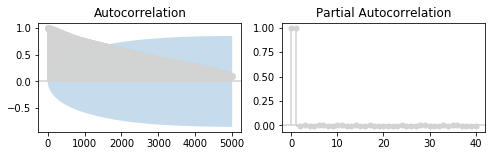

In [1]:
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16").dropna()
lnn225=np.log(n225)
fig = plt.figure(figsize=(8,2))
ax1 = fig.add_subplot(1,2,1)
fig = sm.graphics.tsa.plot_acf(lnn225.squeeze(), lags=5000, color='lightgray',ax=ax1)
ax2 = fig.add_subplot(1,2,2)
fig = sm.graphics.tsa.plot_pacf(lnn225.squeeze(), lags=40,color='lightgray', ax=ax2)

In [2]:
arma_mod = sm.tsa.ARMA(lnn225,order=(1,0))
arma_res = arma_mod.fit(trend='c', disp=-1)
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:              NIKKEI225   No. Observations:                17083
Model:                     ARMA(1, 0)   Log Likelihood               50852.015
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 15 Jan 2018   AIC                        -101698.030
Time:                        16:25:31   BIC                        -101674.792
Sample:                    05-16-1949   HQIC                       -101690.369
                         - 01-12-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.7144      2.191      3.520      0.000       3.419      12.010
ar.L1.NIKKEI225     1.0000   1.93e-05   5.19e+04      0.000       1.000       1.000
                                

Text(0,0.5,u'$\\hat{z_t}$')

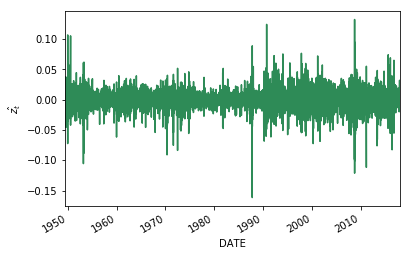

In [3]:
arma_res.resid.iloc[1:].plot(figsize=(6,4),color='seagreen')
plt.ylabel('$\hat{z_t}$')

In [4]:
from statsmodels.tsa import stattools
acf,q,pvalue = stattools.acf(arma_res.resid,nlags=5,qstat=True)
pacf,confint = stattools.pacf(arma_res.resid,nlags=5,alpha=0.05)
print "自己相関係数：",acf
print "p値:",pvalue
print "偏自己相関:",pacf
print "95%信頼区間:",confint

自己相関係数： [ 1.          0.00838399 -0.001261    0.00487106  0.00544129 -0.00553941]
p値: [ 0.27312261  0.54113666  0.65179145  0.71010426  0.75162013]
偏自己相関: [ 1.          0.00838448 -0.00133154  0.00489402  0.00535938 -0.00561949]
95%信頼区間: [[ 1.          1.        ]
 [-0.0066112   0.02338015]
 [-0.01632722  0.01366413]
 [-0.01010165  0.0198897 ]
 [-0.0096363   0.02035505]
 [-0.02061517  0.00937618]]


In [5]:
p=sm.tsa.adfuller(arma_res.resid,regression='nc')[1] #[1]はp値の検定結果
p1=sm.tsa.adfuller(arma_res.resid,regression='c')[1] #[1]はp値の検定結果
print "ドリフト無しランダムウォーク p値:",p
print "ドリフト付きランダムウォーク p値:",p1


ドリフト無しランダムウォーク p値: 0.0
ドリフト付きランダムウォーク p値: 0.0


In [6]:
from scipy.stats import t
resid=arma_res.resid.iloc[1:]
m=resid.mean()
v=resid.std()
resid_max=pd.Series.rolling(arma_res.resid,window=250).mean().max()
resid_min=pd.Series.rolling(arma_res.resid,window=250).mean().min()
print "平均:              %2.5f"%m,"標準偏差：          %2.4f"%v
print "250日平均の最大値: %2.5f"%resid_max,"250日平均の最小値: %2.5f"%resid_min
print "250日平均の95%の信頼区間: ",(t.interval(alpha=0.95, df=250, loc=0, scale=v))


平均:              0.00030 標準偏差：          0.0123
250日平均の最大値: 0.00363 250日平均の最小値: -0.01259
250日平均の95%の信頼区間:  (-0.02427045850581163, 0.02427045850581163)


Text(0,0.5,u'$\\hat{z_t}$')

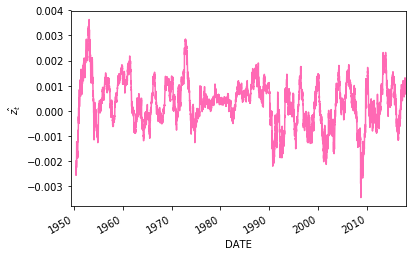

In [7]:
pd.Series.rolling(arma_res.resid.iloc[1:],250).mean().plot(figsize=(6,4),color='hotpink')
plt.ylabel('$\hat{z_t}$')

In [8]:
from scipy.stats import chi2
resid=arma_res.resid.iloc[1:]
m=resid.mean()
v=resid.std()
resid_max=pd.Series.rolling(arma_res.resid,window=250).std().max()
resid_min=pd.Series.rolling(arma_res.resid,window=250).std().min()
print "平均:                 %2.5f"%m,"        標準偏差：    %2.5f"%v 
print "250日標準偏差の最大値:%2.5f"%resid_max,"250日標準偏差の最小値:%2.5f"%resid_min

cint1,cint2=chi2.interval(alpha=(0.95), df=249)

print "250日標準偏差の95pctの信頼区間:%2.4f"%(np.sqrt(cint1/249)*v),
print "<= \sigma <=%2.4f"%(np.sqrt(cint2/249)*v)


平均:                 0.00030         標準偏差：    0.01232
250日標準偏差の最大値:0.16184 250日標準偏差の最小値:0.00417
250日標準偏差の95pctの信頼区間:0.0112 <= \sigma <=0.0134


Text(0,0.5,u'$std$')

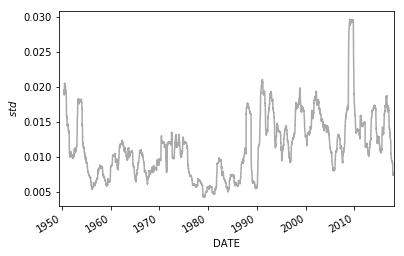

In [9]:
pd.Series.rolling(arma_res.resid.iloc[1:],250).std().plot(figsize=(6,4),color='darkgray')
plt.ylabel('$std$')

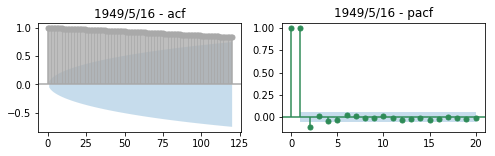

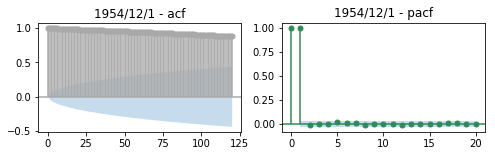

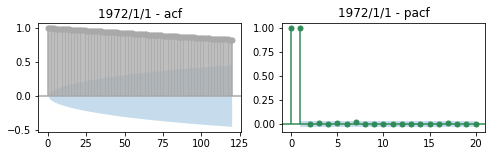

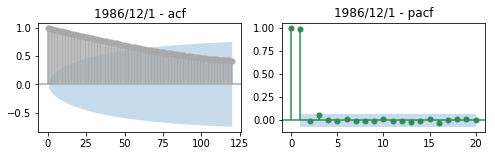

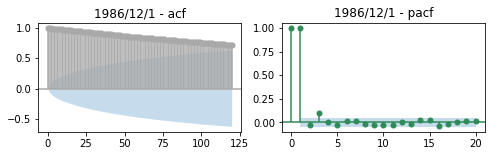

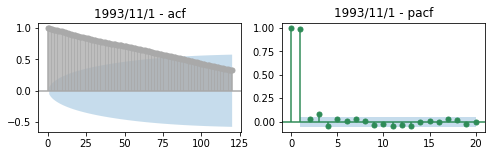

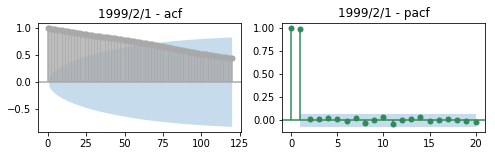

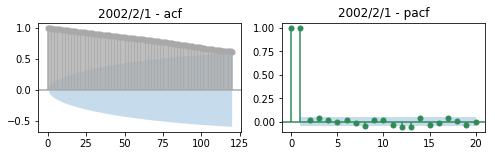

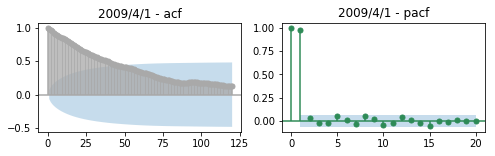

In [10]:
bcs=["1949/5/16","1954/12/1","1972/1/1","1986/12/1","1986/12/1",
     "1993/11/1","1999/2/1","2002/2/1","2009/4/1"]
bce=["1954/11/30","1971/12/31","1986/11/30","1989/12/31","1993/10/30",
     "1999/1/31","2002/1/31","2009/3/31","2012/11/30"]
for i in range(len(bcs)):
    y=lnn225.loc[bcs[i]:bce[i]].dropna()
    fig = plt.figure(figsize=(8,2))
    ax1 = fig.add_subplot(1,2,1)
    fig = sm.graphics.tsa.plot_acf(y.squeeze(), lags=120, ax=ax1,color='darkgray')
    plt.title(bcs[i]+' - acf')
    ax2 = fig.add_subplot(1,2,2)
    fig = sm.graphics.tsa.plot_pacf(y.squeeze(), lags=20, ax=ax2,color='seagreen')
    plt.title(bcs[i]+' - pacf')

In [11]:
for i in range(len(bcs)):
    y=lnn225.loc[bcs[i]:bce[i]].dropna()
    arma_mod = sm.tsa.ARMA(y,order=(1,0))
    arma_res = arma_mod.fit(trend='c', disp=-1)
    print(bcs[i],arma_res.arparams,arma_res.resid.std())

('1949/5/16', array([ 0.99941745]), 0.016123127322593665)
('1954/12/1', array([ 0.99995716]), 0.018855985970349425)


C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in divide
  R_mat, T_mat)
C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in divide
  (1+np.exp(-params))).copy()
C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\moriya\Anaconda2\lib\site-packages\statsmodels\tsa\tsatools.py:5

('1972/1/1', array([ 0.99995968]), 0.017364948756865117)
('1986/12/1', array([ 0.99941777]), 0.017806509977136897)
('1986/12/1', array([ 0.9980365]), 0.015223315206824357)
('1993/11/1', array([ 0.9942536]), 0.014658340642160891)
('1999/2/1', array([ 0.997663]), 0.015757469441078788)
('2002/2/1', array([ 0.99795664]), 0.016698585741687814)
('2009/4/1', array([ 0.9841587]), 0.013948778958654451)
